Importing the dataset

In [43]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_with_LDA_embeddings.csv to Dataset_with_LDA_embeddings.csv


In [67]:
import pandas as pd

# Load the dataset from a CSV file
dataset = pd.read_csv('Dataset_with_LDA_embeddings.csv')

# Display the first few rows of the dataset to confirm it's loaded correctly
print(dataset.head())


                                            sentence  \
0  YouTube is making clear there will be no “birt...   
1  The increasingly bitter dispute between Americ...   
2  So while there may be a humanitarian crisis dr...   
3  A professor who teaches climate change classes...   
4  Looking around the United States, there is nev...   

                                           news_link      outlet  \
0  https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1  https://www.nbcnews.com/news/sports/women-s-te...       msnbc   
2  https://www.alternet.org/2019/01/here-are-5-of...    alternet   
3  https://www.breitbart.com/politics/2019/05/09/...   breitbart   
4  https://thefederalist.com/2020/03/11/woman-who...  federalist   

            topic    type  group_id  num_sent  Label_bias  \
0  elections-2020  center         1         1      Biased   
1           sport    left         1         1  Non-biased   
2     immigration    left         1         1      Biased   
3     envi

START RUNNING HERE

In [68]:
dataset.columns

Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
       'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
       'Text', 'LDA_embeddings'],
      dtype='object')

In [69]:
dataset.dropna(inplace=True)

In [70]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Assuming 'Text' column contains the text data
texts = dataset['Text']
print(texts)

# Tokenize the text
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

# Create a dictionary representation of the documents
dictionary = Dictionary(tokenized_texts)

# Filter out words that occur less than 10 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Create a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Compute coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Choose the number of topics with the highest coherence score
print(coherence_scores)
optimal_num_topics = max(coherence_scores, key=lambda x: x[1])[0]

print("Optimal number of topics:", optimal_num_topics)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       Matt O'Brien\n\nAssociated Press\n\nYouTube is...
1       FRISCO, Texas — The increasingly bitter disput...
2       Speaking to the country for the first time fro...
3       A professor who teaches climate change classes...
4       The left has a thing for taking babies hostage...
                              ...                        
1367    The House Democrats’ coronavirus recovery bill...
1368    There are many reasons that Republicans and co...
1369    A man’s penis becomes a female penis once a ma...
1370    As a self-described Democratic socialist, Sen....
1371    CBS Late Show host Stephen Colbert claimed on ...
Name: Text, Length: 1370, dtype: object


[(2, 0.23831197832898832), (3, 0.2371974535542407), (4, 0.23441995675127425), (5, 0.2327442280192126), (6, 0.24245259455098475), (7, 0.23205702570207784), (8, 0.25005834151672335), (9, 0.23463964828342881), (10, 0.2405279230157416)]
Optimal number of topics: 8


In [50]:
dataset = dataset.copy()

In [71]:
dataset.columns, dataset.shape

(Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
        'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
        'Text', 'LDA_embeddings'],
       dtype='object'),
 (1370, 13))

In [72]:
dataset.dtypes

sentence          object
news_link         object
outlet            object
topic             object
type              object
group_id           int64
num_sent           int64
Label_bias        object
Label_opinion     object
article           object
biased_words4     object
Text              object
LDA_embeddings    object
dtype: object

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

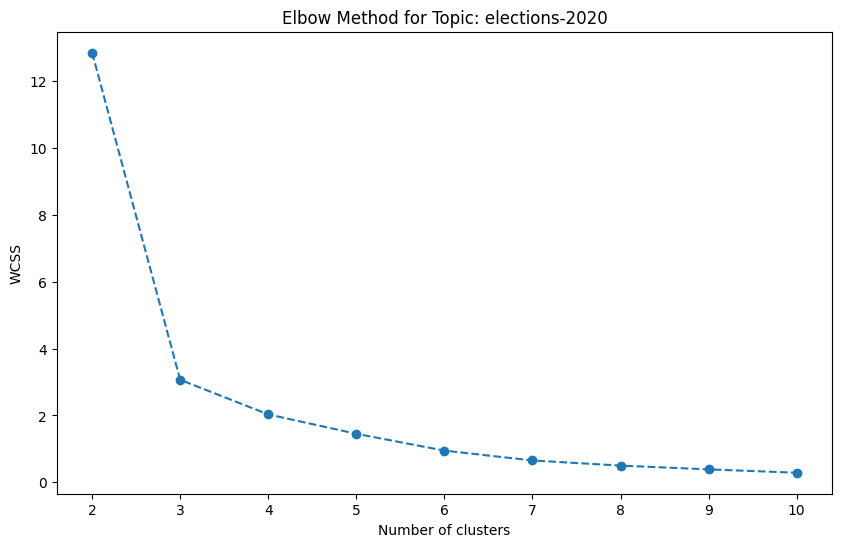

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: elections-2020, Optimum Clusters: 3, Silhouette Score: 0.7532108640762565


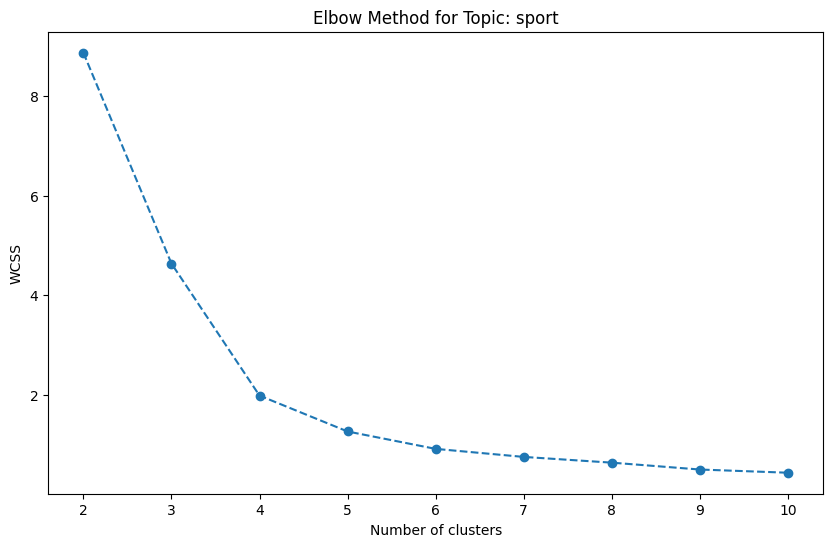

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: sport, Optimum Clusters: 3, Silhouette Score: 0.7273461611486576


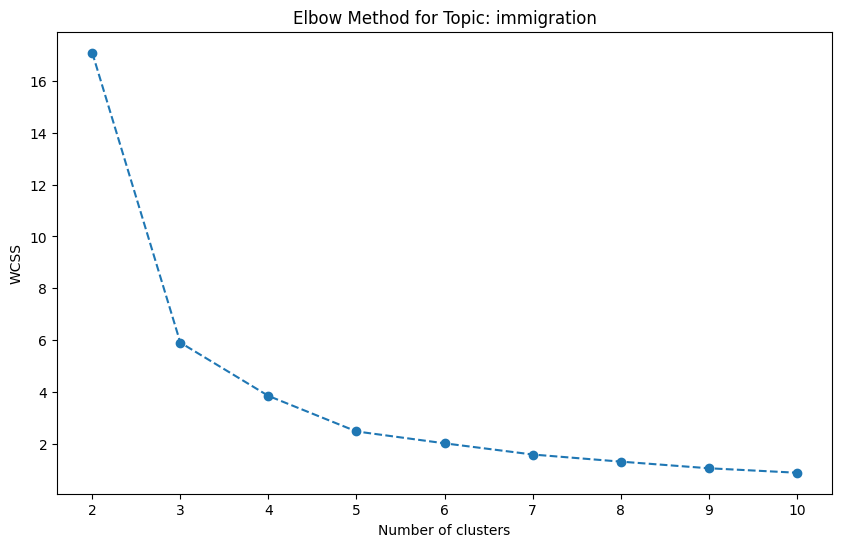

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: immigration, Optimum Clusters: 3, Silhouette Score: 0.6298184656527323


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

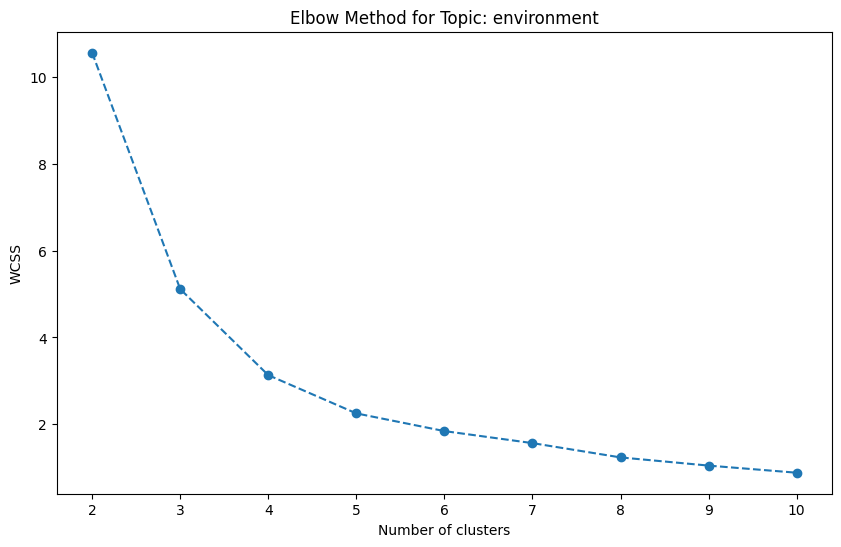

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: environment, Optimum Clusters: 4, Silhouette Score: 0.6090734529119278


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

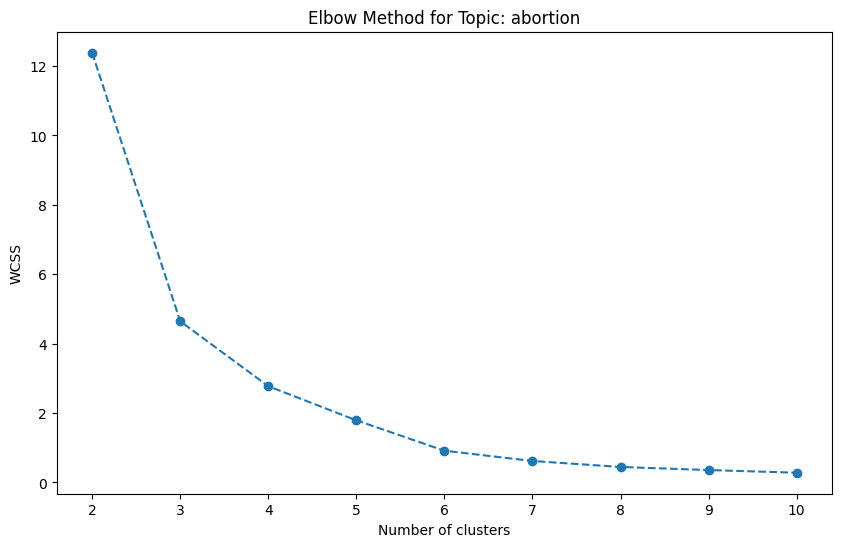

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: abortion, Optimum Clusters: 10, Silhouette Score: 0.7105745064972406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

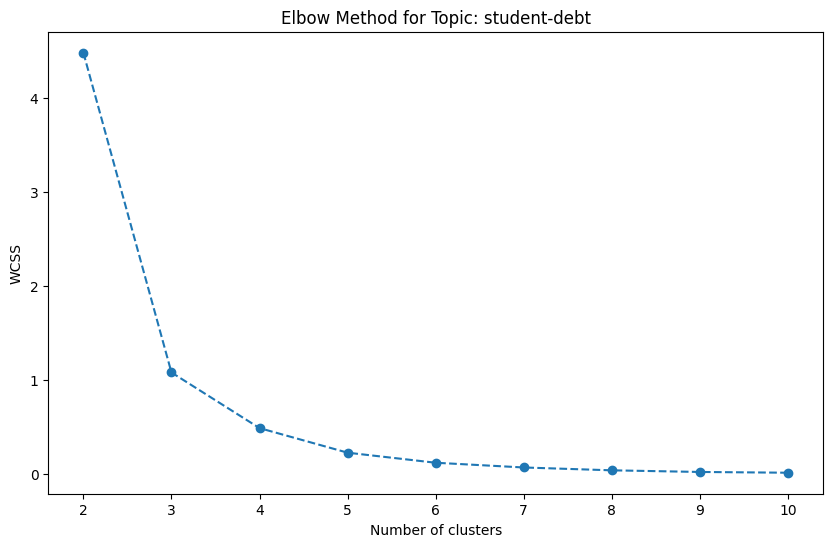

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: student-debt, Optimum Clusters: 3, Silhouette Score: 0.9359060707461753


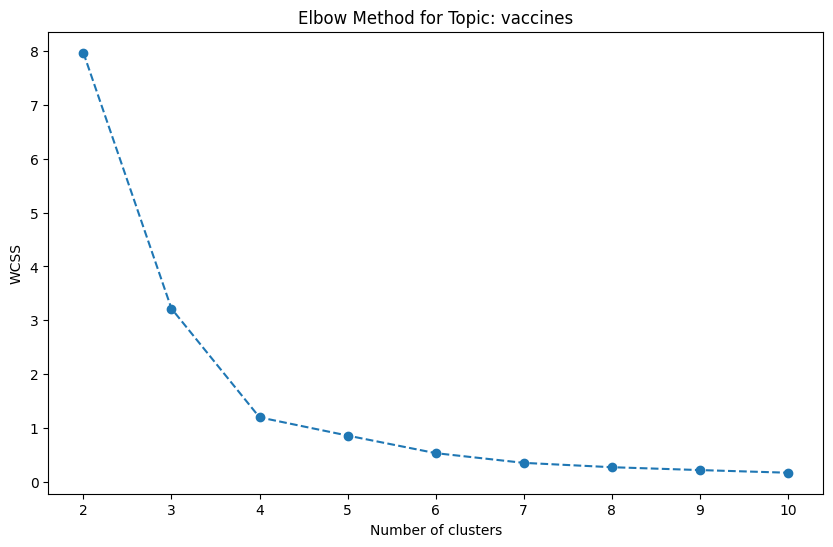

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: vaccines, Optimum Clusters: 10, Silhouette Score: 0.8040994170602943


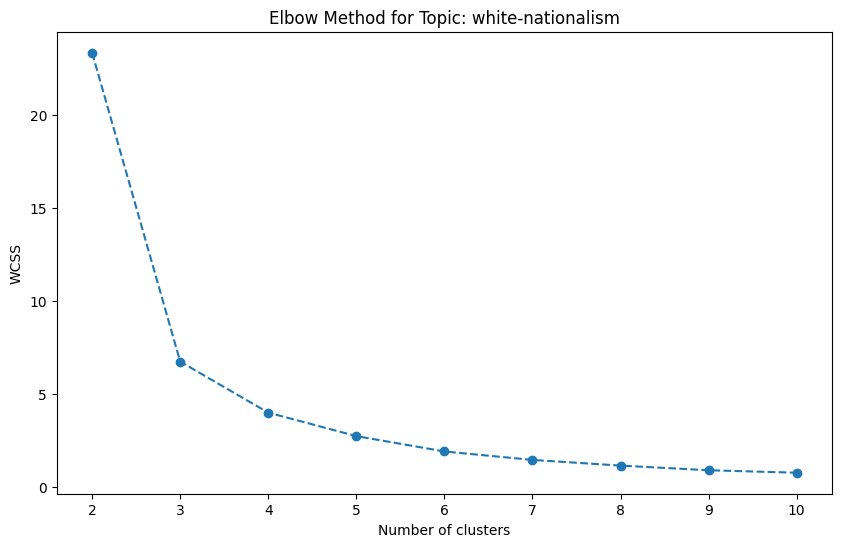

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: white-nationalism, Optimum Clusters: 8, Silhouette Score: 0.7266152085205514


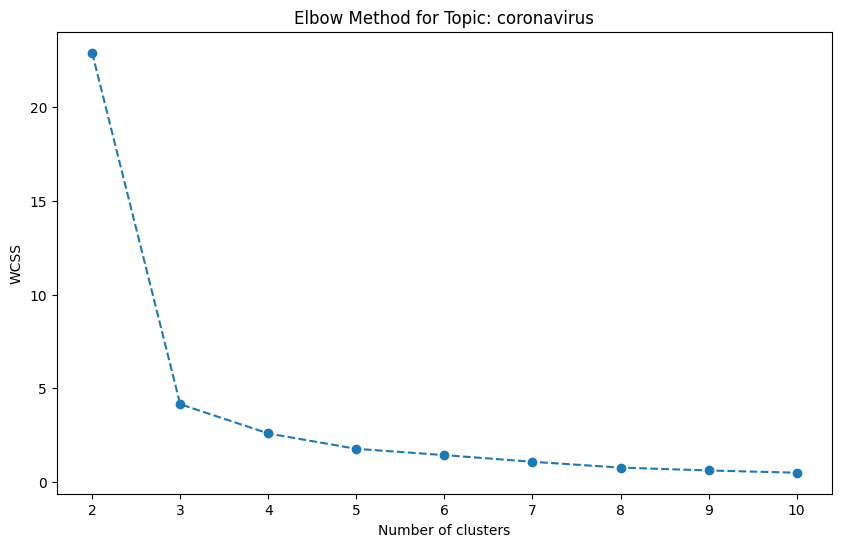

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: coronavirus, Optimum Clusters: 3, Silhouette Score: 0.7685410264714237


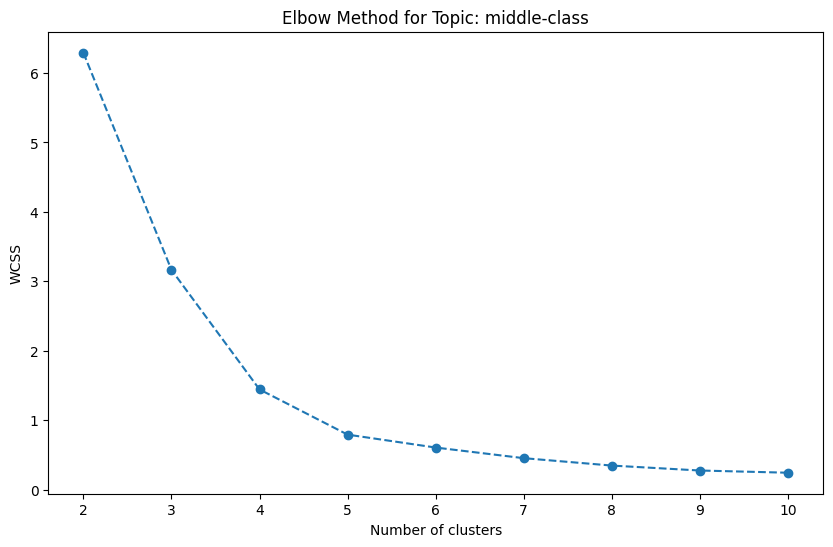

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: middle-class, Optimum Clusters: 4, Silhouette Score: 0.7522828303556716


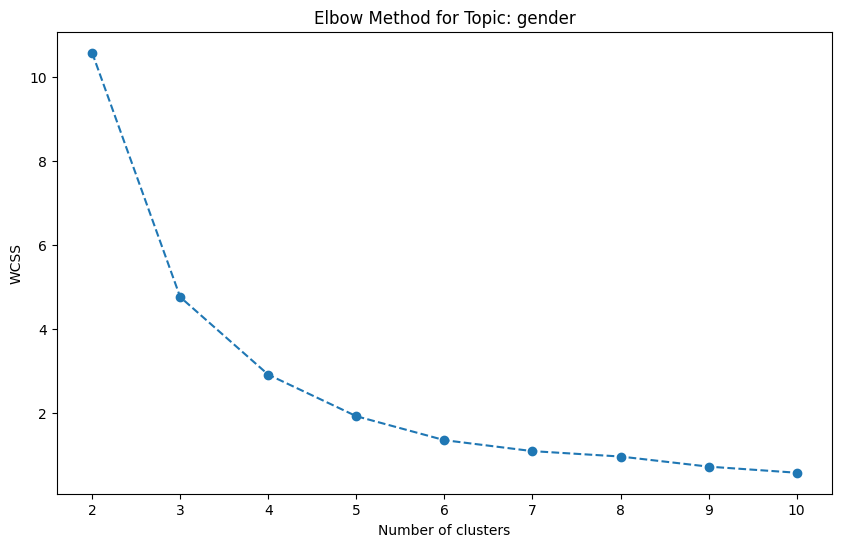

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: gender, Optimum Clusters: 5, Silhouette Score: 0.6538264059454107


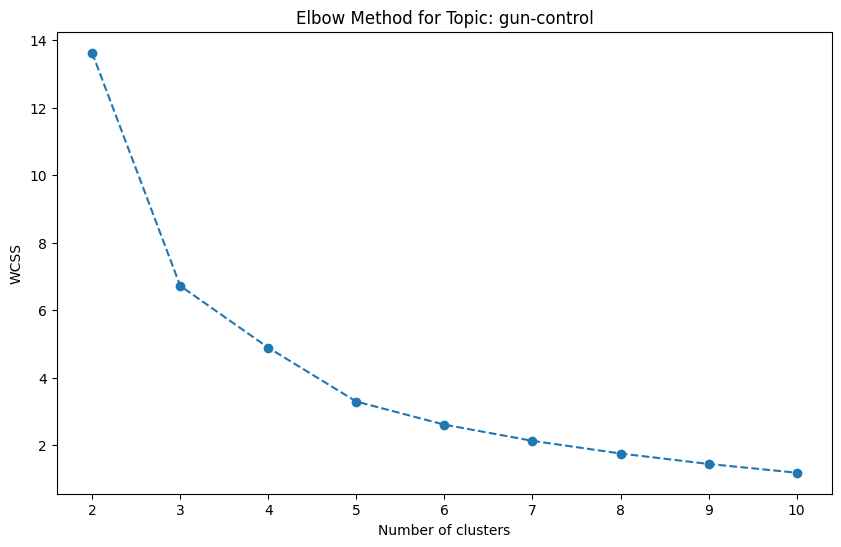

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: gun-control, Optimum Clusters: 3, Silhouette Score: 0.5511179430571145


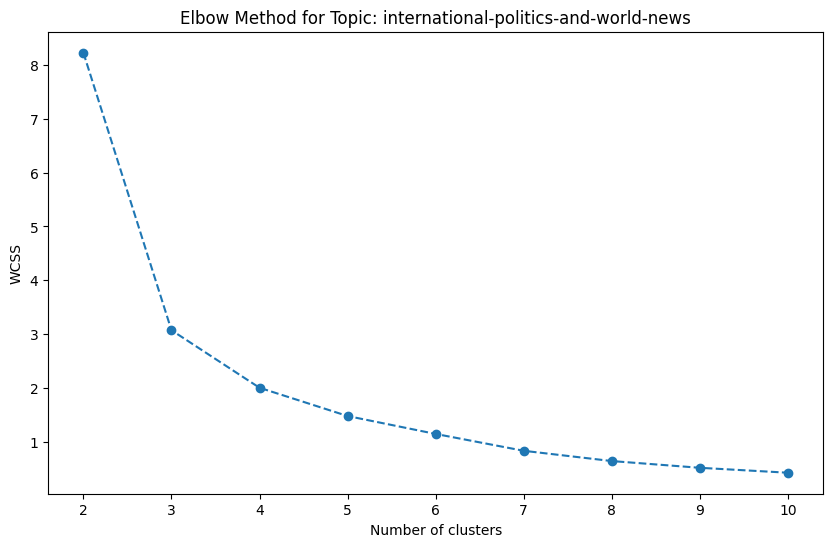

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: international-politics-and-world-news, Optimum Clusters: 10, Silhouette Score: 0.6650363959101521


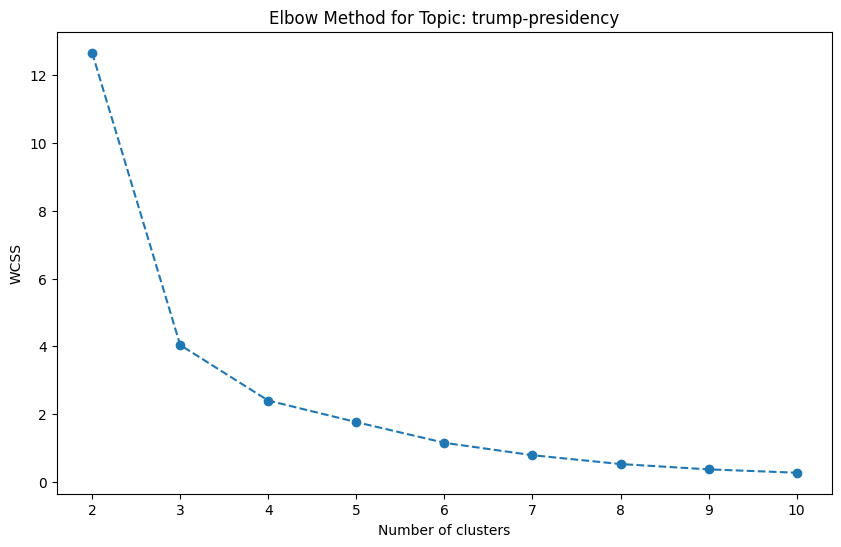

Topic: trump-presidency, Optimum Clusters: 10, Silhouette Score: 0.8366805684295118


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import ast

# Assuming 'df' is your DataFrame and 'Bert_embeddings' are in the correct format

# Placeholder for the optimum number of clusters and silhouette scores
dataset['Optimum_Clusters'] = None
dataset['Silhouette_Score'] = None

# Iterate over each topic
for topic in dataset['topic'].unique():
    # Extract LDA embeddings for the current topic
    topic_embeddings = dataset.loc[dataset['topic'] == topic, 'LDA_embeddings'].apply(ast.literal_eval).tolist()
    embeddings_array = np.array(topic_embeddings)

    # Variables to store the best scores and cluster numbers
    best_n_clusters = 0
    best_silhouette = -1

    # Elbow method: calculate WCSS for a range of cluster numbers
    wcss = []
    for n_clusters in range(2, 11):  # Example range from 2 to 10
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings_array)
        wcss.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(embeddings_array, kmeans.labels_)

        # Check if this is the best silhouette score so far
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_n_clusters = n_clusters

    # Plot WCSS for the current topic
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
    plt.title(f'Elbow Method for Topic: {topic}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Perform clustering with the best number of clusters and update the DataFrame
    final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=0).fit(embeddings_array)
    dataset.loc[dataset['topic'] == topic, 'Cluster'] = final_kmeans.labels_
    dataset.loc[dataset['topic'] == topic, 'Optimum_Clusters'] = best_n_clusters
    dataset.loc[dataset['topic'] == topic, 'Silhouette_Score'] = best_silhouette

    print(f"Topic: {topic}, Optimum Clusters: {best_n_clusters}, Silhouette Score: {best_silhouette}")


In [74]:
dataset.head(5)

,sentence,news_link,outlet,topic,type,group_id,num_sent,Label_bias,Label_opinion,article,biased_words4,Text,LDA_embeddings,Optimum_Clusters,Silhouette_Score,Cluster
0,YouTube is making clear there will be no “birt...,https://eu.usatoday.com/story/tech/2020/02/03/...,usa-today,elections-2020,center,1,1,Biased,Somewhat factual but also opinionated,YouTube says no ‘deepfakes’ or ‘birther’ video...,"['belated', 'birtherism']",Matt O'Brien\n\nAssociated Press\n\nYouTube is...,"[0.5119968355612456, 0.3741073934069503, 0.113...",3,0.753211,2.0
1,The increasingly bitter dispute between Americ...,https://www.nbcnews.com/news/sports/women-s-te...,msnbc,sport,left,1,1,Non-biased,Entirely factual,"FRISCO, Texas — The increasingly bitter disput...",['bitter'],"FRISCO, Texas — The increasingly bitter disput...","[0.2623139567475268, 0.07613104104468951, 0.66...",3,0.727346,0.0
2,So while there may be a humanitarian crisis dr...,https://www.alternet.org/2019/01/here-are-5-of...,alternet,immigration,left,1,1,Biased,Expresses writer’s opinion,Speaking to the country for the first time fro...,['crisis'],Speaking to the country for the first time fro...,"[0.10367035662751545, 0.8943813083897882, 0.00...",3,0.629818,0.0
3,A professor who teaches climate change classes...,https://www.breitbart.com/politics/2019/05/09/...,breitbart,environment,right,1,1,Non-biased,No agreement,A professor who teaches climate change classes...,['legitimate'],A professor who teaches climate change classes...,"[0.4351612174486368, 0.17739632014235043, 0.38...",4,0.609073,3.0
4,"Looking around the United States, there is nev...",https://thefederalist.com/2020/03/11/woman-who...,federalist,abortion,right,1,1,Biased,Somewhat factual but also opinionated,The left has a thing for taking babies hostage...,"['killing', 'never', 'developing', 'humans', '...",The left has a thing for taking babies hostage...,"[0.0008456612534198671, 0.9983176539535233, 0....",10,0.710575,5.0


In [75]:
dataset[["outlet","topic","Cluster","Optimum_Clusters","Silhouette_Score"]]

,outlet,topic,Cluster,Optimum_Clusters,Silhouette_Score
0,usa-today,elections-2020,2.0,3,0.753211
1,msnbc,sport,0.0,3,0.727346
2,alternet,immigration,0.0,3,0.629818
3,breitbart,environment,3.0,4,0.609073
4,federalist,abortion,5.0,10,0.710575
...,...,...,...,...,...
1367,breitbart,coronavirus,0.0,3,0.768541
1368,alternet,gender,0.0,5,0.653826
1369,breitbart,gender,0.0,5,0.653826
1370,fox-news,middle-class,1.0,4,0.752283


In [77]:
dataset['Silhouette_Score'].unique(), dataset['Optimum_Clusters'].unique()

(array([0.7532108640762565, 0.7273461611486576, 0.6298184656527323,
        0.6090734529119278, 0.7105745064972406, 0.9359060707461753,
        0.8040994170602943, 0.7266152085205514, 0.7685410264714237,
        0.7522828303556716, 0.6538264059454107, 0.5511179430571145,
        0.6650363959101521, 0.8366805684295118], dtype=object),
 array([3, 4, 10, 8, 5], dtype=object))

In [79]:
# Here, we drop duplicates assuming each topic has a unique 'Optimum_Clusters' and 'Silhouette_Score'
unique_topics_dataset = dataset.drop_duplicates(subset=['topic', 'Optimum_Clusters'])

# Now group by 'Optimum_Clusters' to count unique topics in each cluster count
grouped_by_optimal_clusters = unique_topics_dataset.groupby('Optimum_Clusters')['topic'].nunique()

# Display the results
print("Unique topics per Optimum_Clusters:\n", grouped_by_optimal_clusters)

Unique topics per Optimum_Clusters:
 Optimum_Clusters
3     6
4     2
5     1
8     1
10    4
Name: topic, dtype: int64


Now setting the number of clusters to 3

In [91]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import ast
import json


# Placeholder for centroids
centroids = {}

# Directly set the number of clusters to 3
n_clusters = 3

# Iterate over each topic
for topic in dataset['topic'].unique():
    # Extract LDA embeddings for the current topic
    topic_embeddings = dataset.loc[dataset['topic'] == topic, 'LDA_embeddings'].apply(ast.literal_eval).tolist()
    embeddings_array = np.array(topic_embeddings)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings_array)

    # Calculate silhouette score for the clustering
    silhouette_avg = silhouette_score(embeddings_array, kmeans.labels_)

    # Update the DataFrame with the clustering results and silhouette score
    dataset.loc[dataset['topic'] == topic, 'Cluster'] = kmeans.labels_
    dataset.loc[dataset['topic'] == topic, 'Optimum_Clusters'] = n_clusters
    dataset.loc[dataset['topic'] == topic, 'Silhouette_Score'] = silhouette_avg

    # Save centroids for the current topic
    centroids[topic] = kmeans.cluster_centers_.tolist()

    print(f"Topic: {topic}, Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

# Save the centroids dictionary to a JSON file
with open('cluster_centroids.json', 'w') as f:
    json.dump(centroids, f)

print("Centroids saved to cluster_centroids.json")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: elections-2020, Clusters: 3, Silhouette Score: 0.7532108640762565
Topic: sport, Clusters: 3, Silhouette Score: 0.7273461611486576
Topic: immigration, Clusters: 3, Silhouette Score: 0.6298184656527323
Topic: environment, Clusters: 3, Silhouette Score: 0.5906089298918236


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: abortion, Clusters: 3, Silhouette Score: 0.6024896089851961
Topic: student-debt, Clusters: 3, Silhouette Score: 0.9359060707461753
Topic: vaccines, Clusters: 3, Silhouette Score: 0.7620571827344609


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: white-nationalism, Clusters: 3, Silhouette Score: 0.7129437191096438
Topic: coronavirus, Clusters: 3, Silhouette Score: 0.7685410264714237
Topic: middle-class, Clusters: 3, Silhouette Score: 0.6878489245361047


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: gender, Clusters: 3, Silhouette Score: 0.6502317864007797
Topic: gun-control, Clusters: 3, Silhouette Score: 0.5511179430571145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: international-politics-and-world-news, Clusters: 3, Silhouette Score: 0.6161526482714008


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: trump-presidency, Clusters: 3, Silhouette Score: 0.7443934027994564
Centroids saved to cluster_centroids.json


In [84]:
dataset['Silhouette_Score'].unique(), dataset['topic'].unique()

(array([0.75321086, 0.72734616, 0.62981847, 0.59060893, 0.60248961,
        0.93590607, 0.76205718, 0.71294372, 0.76854103, 0.68784892,
        0.65023179, 0.55111794, 0.61615265, 0.7443934 ]),
 array(['elections-2020', 'sport', 'immigration', 'environment',
        'abortion', 'student-debt', 'vaccines', 'white-nationalism',
        'coronavirus', 'middle-class', 'gender', 'gun-control',
        'international-politics-and-world-news', 'trump-presidency'],
       dtype=object))

In [86]:


# Function to clean and prepare text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])
    return text

# Initialize CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english', preprocessor=clean_text)

# Iterate over each topic
for topic in dataset['topic'].unique():
    print(f"Topic: {topic}")

    # Iterate over each cluster within the current topic
    for cluster in dataset[dataset['topic'] == topic]['Cluster'].unique():
        # Select the texts of the articles in the current cluster and topic
        # Ensure all elements are treated as strings
        cluster_texts = dataset[(dataset['topic'] == topic) & (dataset['Cluster'] == cluster)]['Text'].astype(str)

        # If cluster_texts is empty, continue to the next cluster
        if cluster_texts.empty:
            continue

        # Convert series to raw text
        raw_text = " ".join(cluster_texts)

        # Clean the raw_text
        cleaned_text = clean_text(raw_text)

        # Vectorize the text to get word counts
        vectorized_data = vectorizer.fit_transform([cleaned_text])
        sum_words = vectorized_data.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

        # Sort the words by frequency
        sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)

        # Print the top 10 words and their frequencies
        print(f"Cluster {cluster}: Top 10 words")
        for word, freq in sorted_words[:10]:
            print(f"{word}: {freq}")
        print("\n")


Topic: elections-2020
Cluster 2.0: Top 10 words
justice: 97
people: 74
said: 55
criminal: 53
trump: 50
like: 49
president: 42
sanders: 42
federal: 41
biden: 39


Cluster 1.0: Top 10 words
huffpost: 40
news: 36
china: 30
free: 29
stories: 27
obama: 24
expensive: 22
country: 20
help: 20
2024: 19


Cluster 0.0: Top 10 words
voters: 208
said: 205
police: 198
election: 189
trump: 178
voting: 165
president: 160
vote: 137
states: 118
george: 91


Topic: sport
Cluster 0.0: Top 10 words
said: 246
world: 148
soccer: 106
team: 106
womens: 98
sport: 95
players: 89
baseball: 81
sports: 74
game: 67


Cluster 1.0: Top 10 words
sports: 313
football: 211
said: 152
league: 132
players: 132
games: 118
new: 115
sport: 105
baseball: 99
years: 97


Cluster 2.0: Top 10 words
ncaa: 96
said: 80
athletes: 73
college: 44
sports: 35
murphy: 33
advertisement: 29
basketball: 27
wilkens: 27
compensation: 27


Topic: immigration
Cluster 0.0: Top 10 words
said: 119
trump: 118
immigration: 93
border: 78
president: 74
w

In [87]:
# Create a pivot table for a more structured view
pivot_table = dataset.pivot_table(index=['topic', 'Cluster'], columns='type', aggfunc='size', fill_value=0)

# Display the pivot table
print(pivot_table)


type                                           center  left  right
topic                                 Cluster                     
abortion                              0.0           0     8      0
                                      1.0           4    11     15
                                      2.0           2    31     34
coronavirus                           0.0           0    18     11
                                      1.0           4    17     15
                                      2.0           1     3     25
elections-2020                        0.0           5    20     24
                                      1.0           0     9      6
                                      2.0           2     4     10
environment                           0.0           1    28     16
                                      1.0           0    11     17
                                      2.0           3    20     13
gender                                0.0           1    11   

In [90]:
from scipy.optimize import linear_sum_assignment

# Group by 'topic', 'Cluster', 'type', and count
grouped_counts = dataset.groupby(['topic', 'Cluster', 'type']).size().unstack(fill_value=0)

# Optimize label assignments for each topic
for topic, df in grouped_counts.groupby(level=0):
    # Cost matrix: Negative counts because linear_sum_assignment minimizes cost, and we want to maximize counts
    cost_matrix = -df.values

    # Solve the assignment problem
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Print optimal assignments and the strength of association
    print(f"Topic: {topic}")
    for cluster, label_idx in zip(df.index.get_level_values(1)[row_ind], col_ind):
        # Retrieve the original count (strength of association) before negation
        association_strength = -cost_matrix[row_ind, col_ind][list(zip(row_ind, col_ind)).index((cluster, label_idx))]
        print(f"Cluster {cluster} assigned to: {df.columns[label_idx]} with strength of association: {association_strength}")
    print("\n")

Topic: abortion
Cluster 0.0 assigned to: left with strength of association: 8
Cluster 1.0 assigned to: center with strength of association: 4
Cluster 2.0 assigned to: right with strength of association: 34


Topic: coronavirus
Cluster 0.0 assigned to: left with strength of association: 18
Cluster 1.0 assigned to: center with strength of association: 4
Cluster 2.0 assigned to: right with strength of association: 25


Topic: elections-2020
Cluster 0.0 assigned to: right with strength of association: 24
Cluster 1.0 assigned to: left with strength of association: 9
Cluster 2.0 assigned to: center with strength of association: 2


Topic: environment
Cluster 0.0 assigned to: left with strength of association: 28
Cluster 1.0 assigned to: right with strength of association: 17
Cluster 2.0 assigned to: center with strength of association: 3


Topic: gender
Cluster 0.0 assigned to: right with strength of association: 10
Cluster 1.0 assigned to: left with strength of association: 32
Cluster 2.0 a

ANALYSIS

When number of clusters is set to 3:

*   Top silhouette score of 0.93 for the topic 'student-debt'
*   Lowest silhouette score of 0.55 for the topic 'gun control'


We choose these 2 topics to visually analyze.

In [101]:
# Filter the dataset for the topics of interest
topics_of_interest = ['gun-control', 'student-debt']
filtered_dataset = dataset[dataset['topic'].isin(topics_of_interest)]

# Group by 'topic' and 'Cluster', then count the number of articles in each group
cluster_counts = filtered_dataset.groupby(['topic', 'Cluster']).size().reset_index(name='count')

# Display the counts
print(cluster_counts)

          topic  Cluster  count
0   gun-control      0.0     38
1   gun-control      1.0     33
2   gun-control      2.0     30
3  student-debt      0.0    103
4  student-debt      1.0      9
5  student-debt      2.0      4


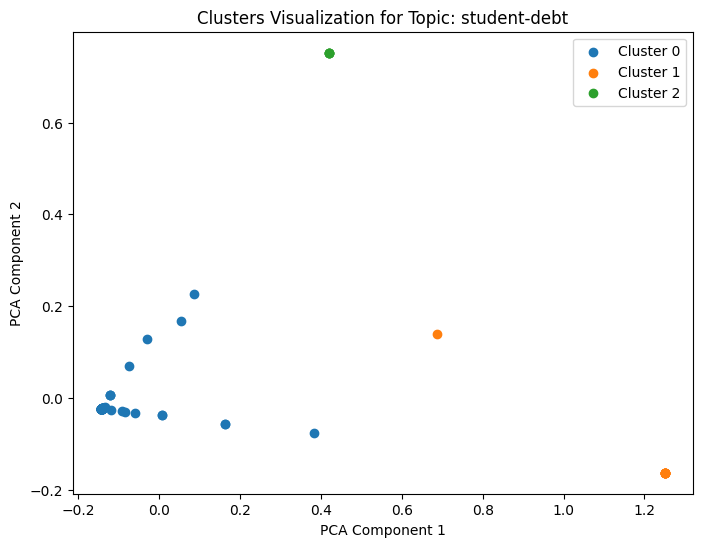

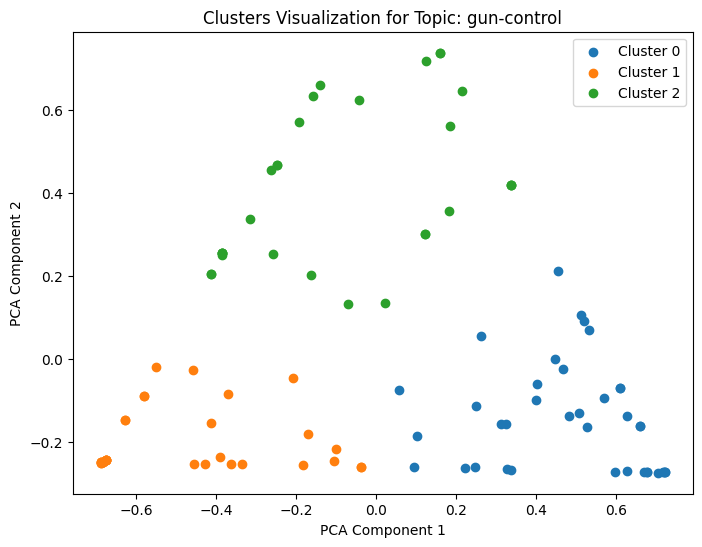

In [96]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ast

# Function to plot clusters for a given topic
def plot_clusters_for_topic(dataset, topic, n_clusters=3):
    # Filter dataset for the topic
    topic_data = dataset[dataset['topic'] == topic]

    # Convert embeddings from strings to lists of floats
    embeddings = topic_data['LDA_embeddings'].apply(ast.literal_eval).tolist()
    embeddings_array = np.array(embeddings)

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings_array)

    # Get cluster labels for the topic
    cluster_labels = topic_data['Cluster'].values

    # Plotting
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        # Filter points belonging to the current cluster
        cluster_points = reduced_embeddings[cluster_labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

    plt.title(f"Clusters Visualization for Topic: {topic}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

# Assuming 'dataset' is your DataFrame with clustering results
# Visualization for 'student-debt'
plot_clusters_for_topic(dataset, 'student-debt', n_clusters=3)

# Visualization for 'gun control'
plot_clusters_for_topic(dataset, 'gun-control', n_clusters=3)


Topic: student-debt


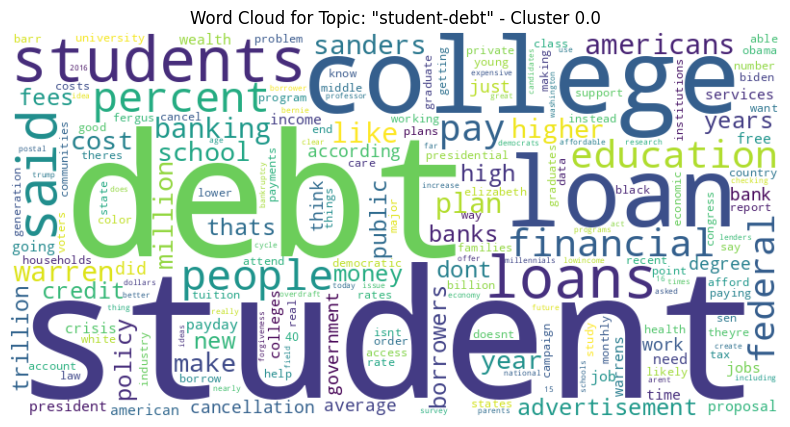

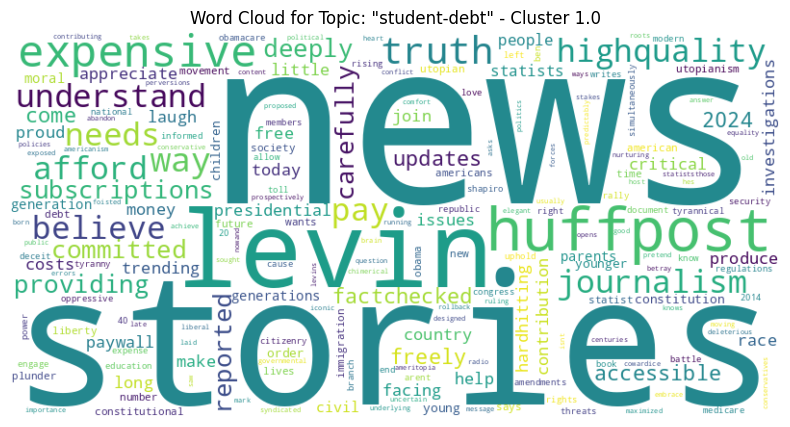

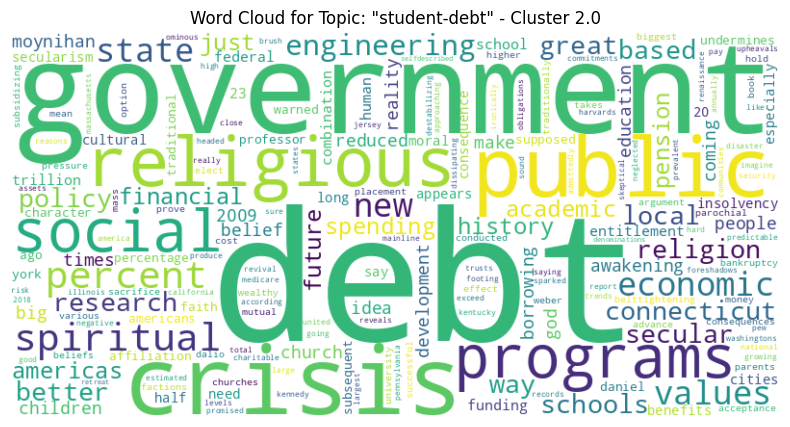

Topic: gun-control


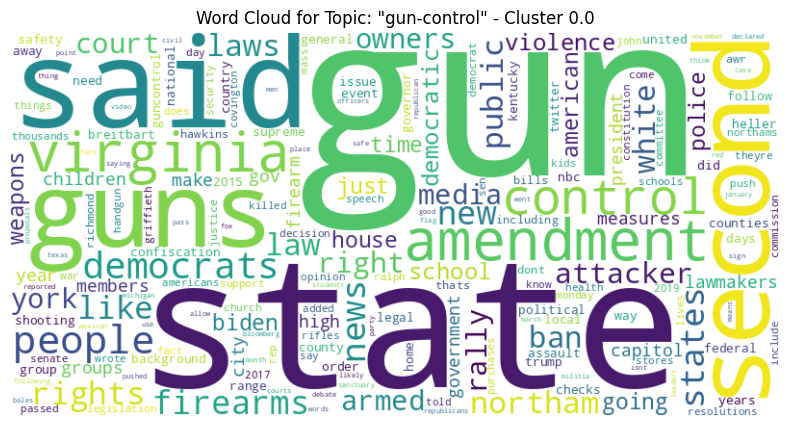

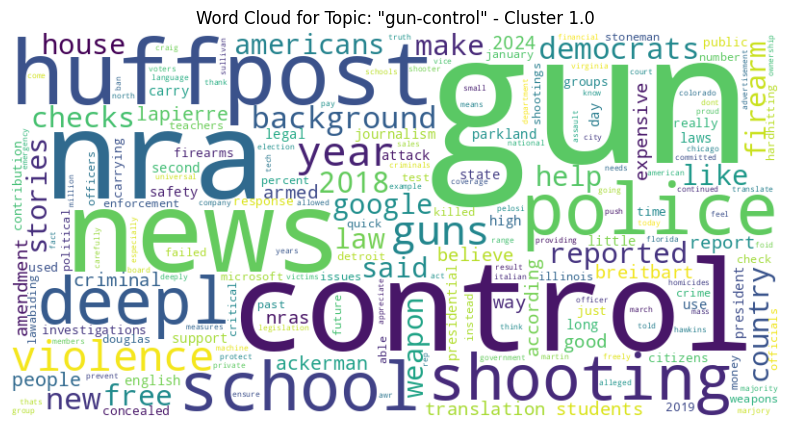

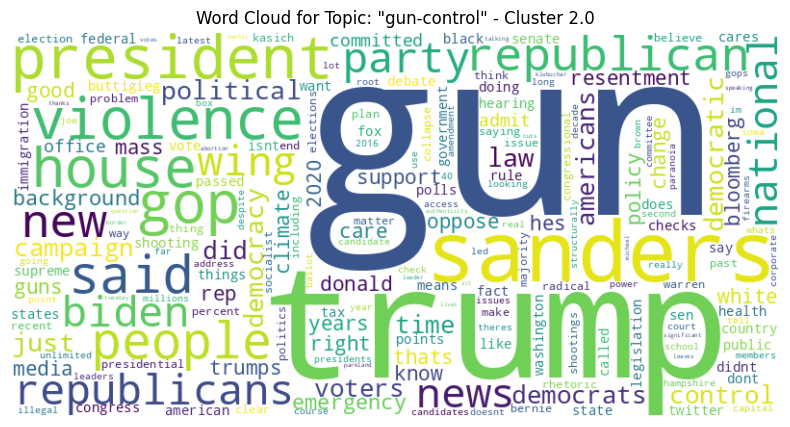

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming the function clean_text(text) is defined as before

# Initialize CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english', preprocessor=clean_text)

# Specific topics of interest
topics_of_interest = ['student-debt', 'gun-control']

# Iterate over each specified topic
for topic in topics_of_interest:
    print(f"Topic: {topic}")

    # Iterate over each cluster within the current topic
    for cluster in dataset[dataset['topic'] == topic]['Cluster'].unique():
        # Select the texts of the articles in the current cluster and topic
        cluster_texts = dataset[(dataset['topic'] == topic) & (dataset['Cluster'] == cluster)]['Text'].astype(str)

        # If cluster_texts is empty, continue to the next cluster
        if cluster_texts.empty:
            continue

        # Convert series to raw text
        raw_text = " ".join(cluster_texts)

        # Clean the raw_text
        cleaned_text = clean_text(raw_text)

        # Vectorize the text to get word counts
        vectorized_data = vectorizer.fit_transform([cleaned_text])
        sum_words = vectorized_data.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

        # Creating a word cloud
        wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(words_freq))

        # Plotting the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Topic: "{topic}" - Cluster {cluster}')
        plt.axis("off")
        plt.show()
